In [20]:
%%capture
#!pip install perfplot
import numpy as np
import pandas as pd
import perfplot
np.random.seed(120)

def np_add(x):
    np_array = x['np']
    np_array2 = x['np2']
    return np_array + np_array2

def py_add(x):
    py_list = x['py']
    py_list2 = x['py2']
    return [num + py_list2[i] for i, num in enumerate(py_list)]

def setup(n):
    np_array = np.random.randint(1, 100, size=n)
    py_list = list(np_array)
    np_array2 = np.random.randint(1, 100, size=n)
    py_list2 = list(np_array2)
    return {'np': np_array, 'py': py_list, 'np2': np_array2, 'py2': py_list2}

out = perfplot.bench(
    setup=setup,
    kernels=[np_add, py_add],
    n_range=[i for i in range(100,10000101, 1000000)],
    logx=False,
    logy=False,
    equality_check=False,
    xlabel='Num of Elements in List/Array',
    title='Numpy Array vs Python List')

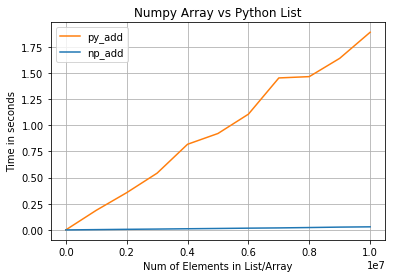

In [21]:
out.show()
out.save('np_array_vs_py_list.png')